1.3029500000000396


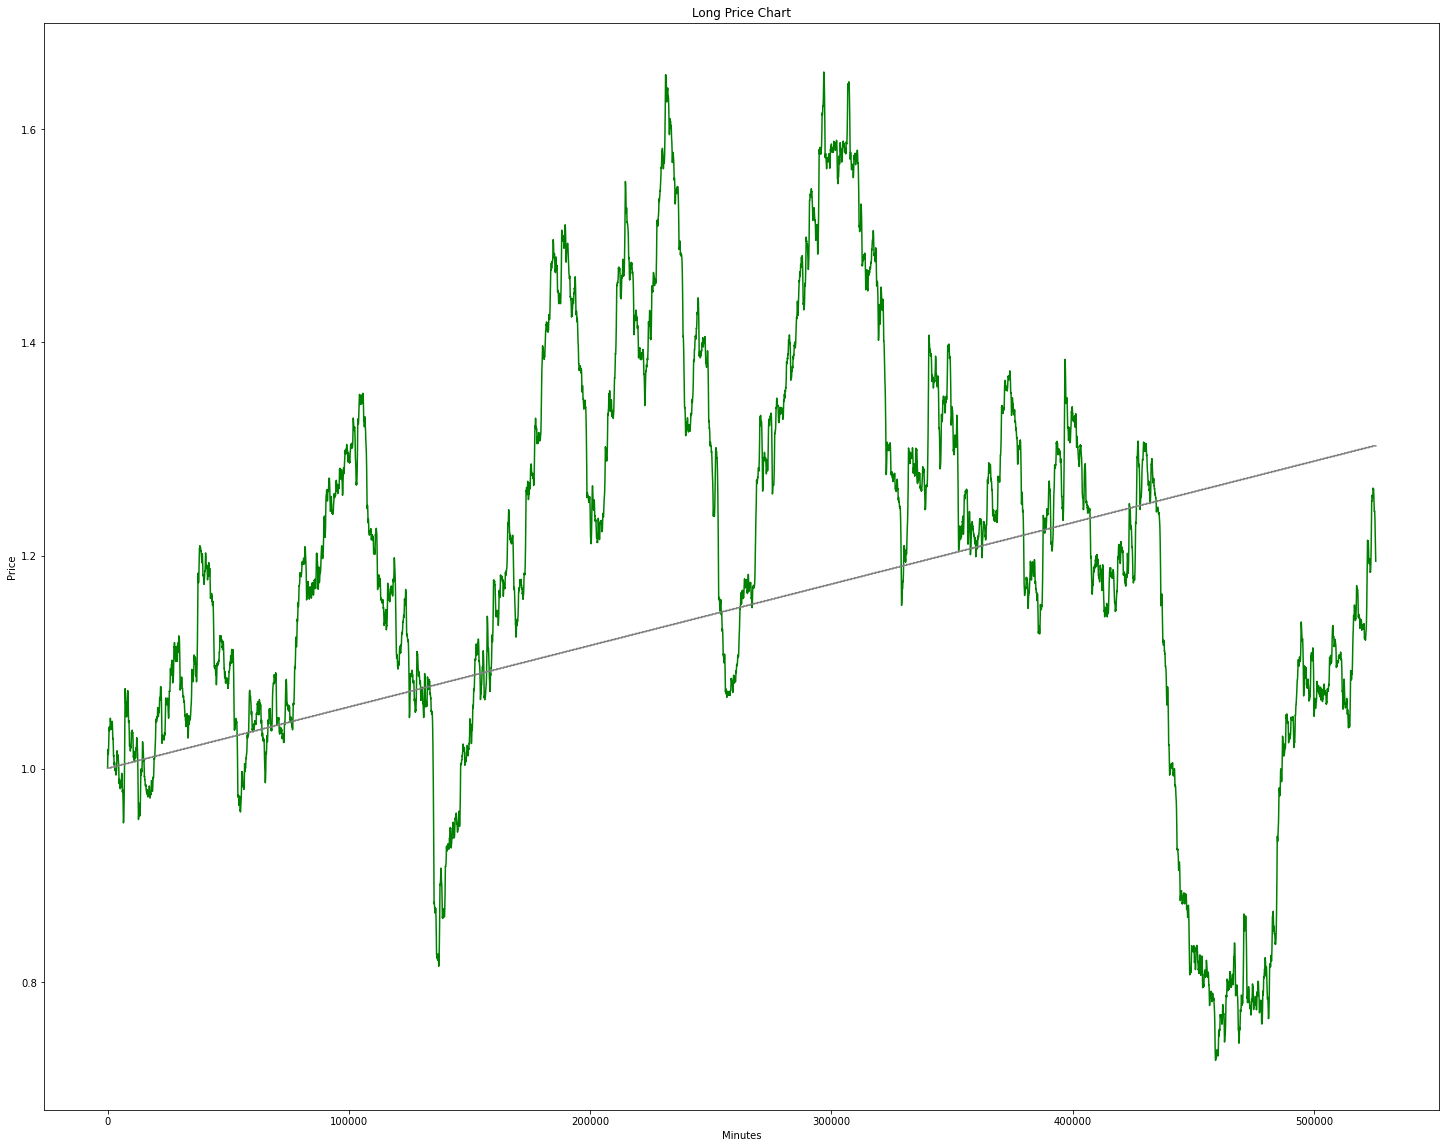

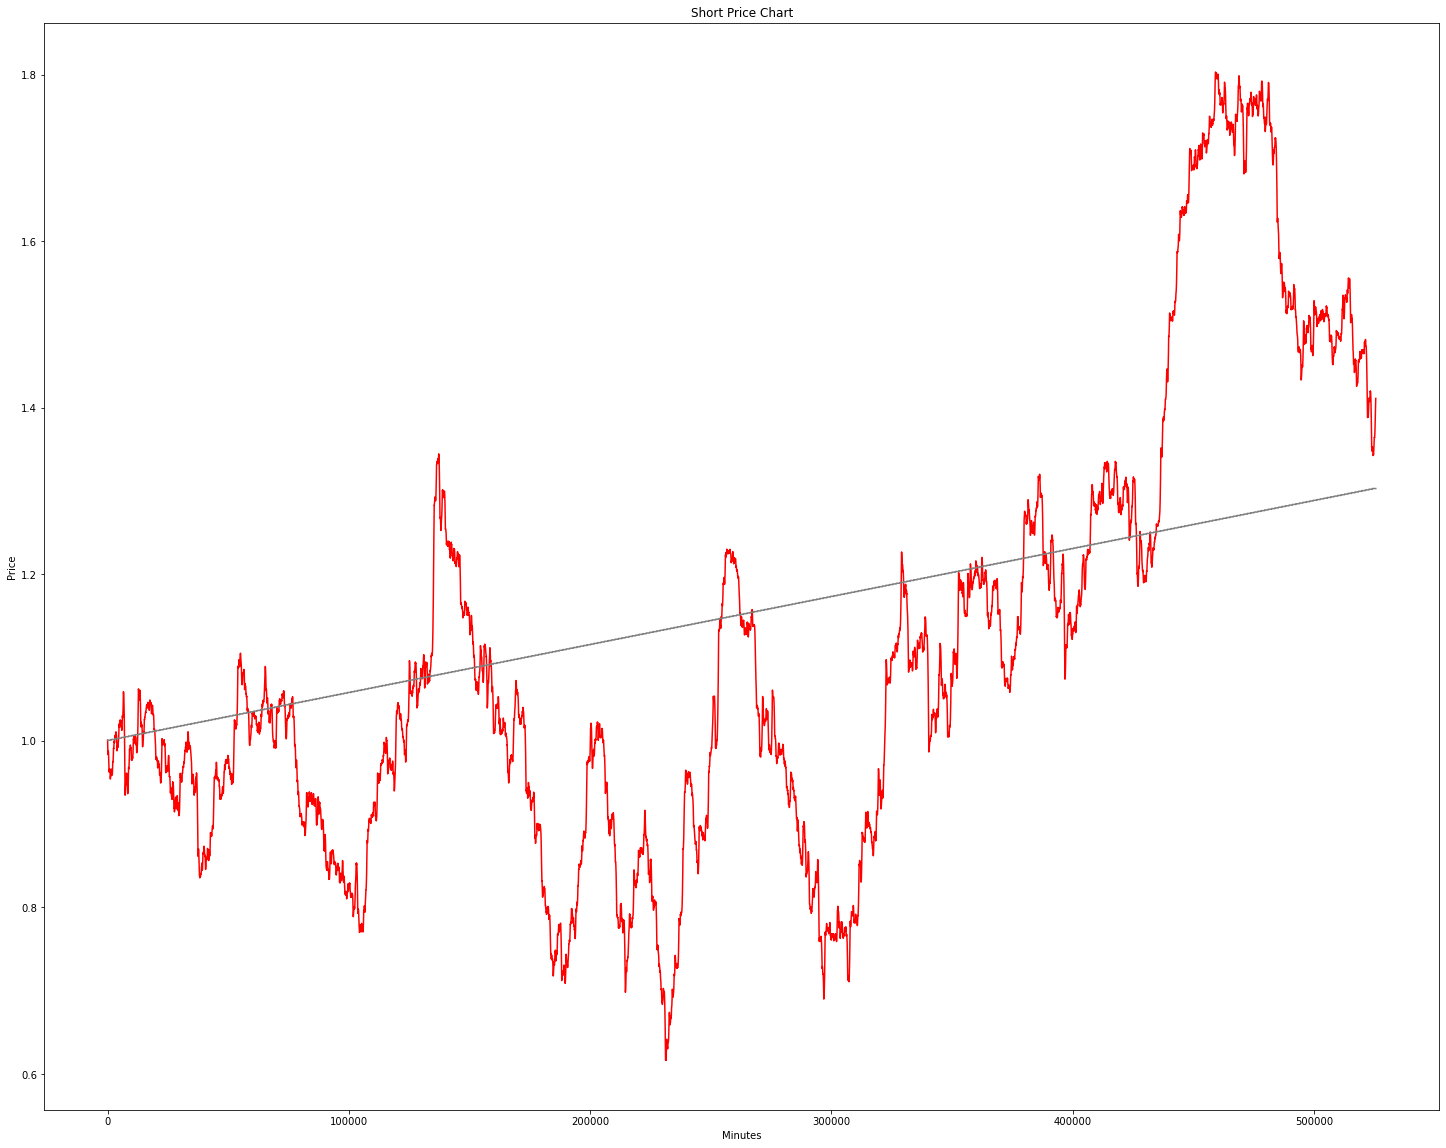

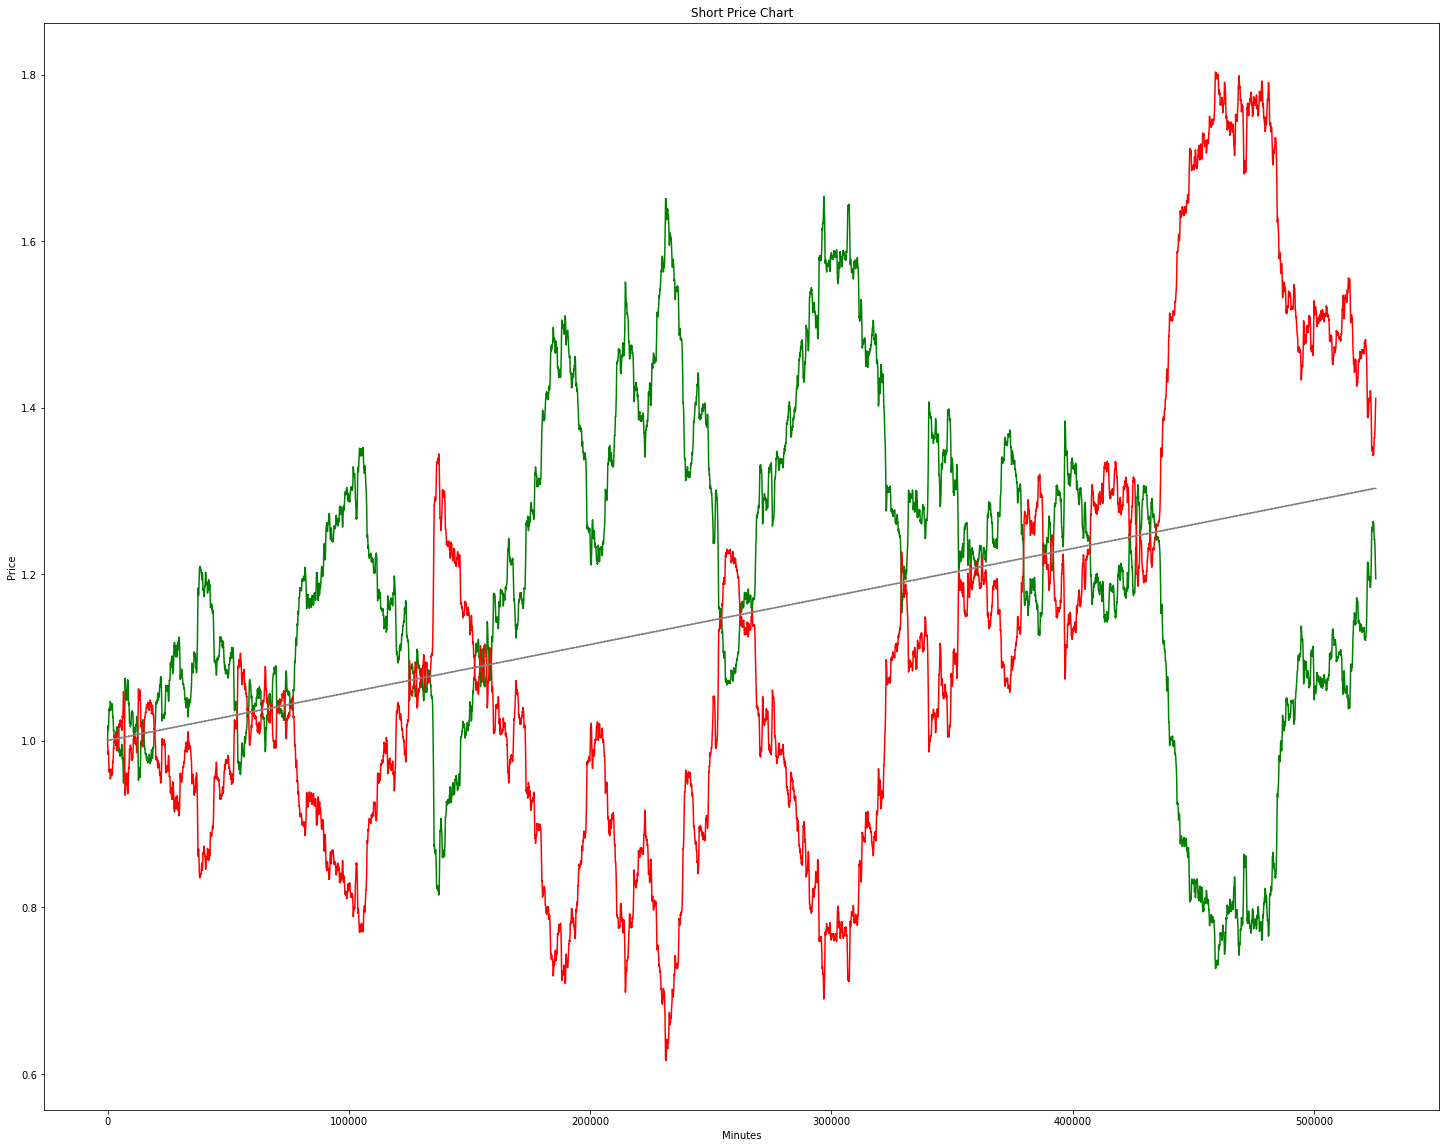

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

STEPS_PER_MINUTE = 1
STEPS_PER_HOUR = 60 * STEPS_PER_MINUTE
STEPS_PER_DAY = 24 * STEPS_PER_HOUR
STEPS_PER_WEEK = 7 * STEPS_PER_DAY
STEPS_PER_MONTH = 30 * STEPS_PER_DAY
STEPS_PER_YEAR = 365 * STEPS_PER_DAY

TOTAL_STEPS = STEPS_PER_YEAR

#APD = 0.00055000
APD = 0.00083

TREND_SIGN_CHANGE_P = 0.01
TREND_SIGN_CHANGE_P_FACTOR = 0.002
START_PRICE = 1.0
TREND_MODIFIER = 0.000001
DEFAULT_TREND = 0.0001

cur_trend = DEFAULT_TREND
cur_trend_sign = 1

cur_long_price = START_PRICE
cur_short_price = START_PRICE
target_price = START_PRICE

long_prices = []
short_prices = []
target_prices = []

def apply_apd():
    global cur_long_price
    global cur_short_price
    global target_price

    if cur_trend_sign == 1:
        cur_long_price += cur_trend
        cur_short_price -= cur_trend
    else:
        cur_long_price -= cur_trend
        cur_short_price += cur_trend

    if step % STEPS_PER_DAY == 0:
        cur_short_price += APD
        cur_long_price += APD
        target_price += APD

    cur_long_price = max(0.01, min(100, cur_long_price))
    cur_short_price = max(0.01, min(100, cur_short_price))

def calc_new_trend():
    global cur_trend

    cur_trend += TREND_MODIFIER * np.random.rand()

def calc_new_trend_sign():
    global cur_trend_sign
    global cur_trend

    r = np.random.rand()
    p = TREND_SIGN_CHANGE_P

    d = 1 - target_price / cur_long_price
    m = abs(d) * TREND_SIGN_CHANGE_P_FACTOR

    uptrend = cur_trend_sign == 1
    downtrend = cur_trend_sign == -1
    overpriced = d > 0
    underpriced = d < 0

    if uptrend and overpriced or downtrend and underpriced:
        p += m

    if uptrend and underpriced or downtrend and overpriced:
        p -= m

    if r < p:
        cur_trend_sign *= -1
        cur_trend = 0

for step in range(STEPS_PER_YEAR):
    calc_new_trend_sign()

    calc_new_trend()
    apply_apd()
    
    long_prices.append(cur_long_price)
    short_prices.append(cur_short_price)
    target_prices.append(target_price)

# Plot results
plt.figure(figsize=(25, 20))
plt.plot(long_prices, color="green")
plt.plot(target_prices, color="gray")
plt.title("Long Price Chart")
plt.xlabel("Minutes")
plt.ylabel("Price")
plt.show()

# Plot results
plt.figure(figsize=(25, 20))
plt.plot(short_prices, color="red")
plt.plot(target_prices, color="gray")
plt.title("Short Price Chart")
plt.xlabel("Minutes")
plt.ylabel("Price")
plt.show()

# Plot results
plt.figure(figsize=(25, 20))
plt.plot(long_prices, color="green")
plt.plot(short_prices, color="red")
plt.plot(target_prices, color="gray")
plt.title("Short-Long Price Chart")
plt.xlabel("Minutes")
plt.ylabel("Price")
plt.show()